## Ordination


In [1]:
library(phyloseq)
library (vegan)
library(ggplot2)

Warning message:
“replacing previous import ‘BiocGenerics::Position’ by ‘ggplot2::Position’ when loading ‘phyloseq’”Creating a generic function for ‘nchar’ from package ‘base’ in package ‘S4Vectors’
Warning message:
“replacing previous import ‘S4Vectors::Position’ by ‘ggplot2::Position’ when loading ‘DESeq2’”Loading required package: permute
Loading required package: lattice
This is vegan 2.4-6


Cargar los objetos en phyloseq

## Taxonomic diversity  

In [10]:
gen_otu<- as.matrix(read.table("genus.tab", header=T, row.names=1))
genOTU=otu_table(gen_otu, taxa_are_rows=T)
mats2=phyloseq(genOTU)
mats2=phyloseq(genOTU, sampledata)
estimate_richness(mats2)->div_alpha2
as.data.frame(t(gen_otu))->gen1

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher,Pielou2,⋯,year,samp_period,water_level,temp,sp_comd,salt,pH,season_year,wl_order,season
S1,791,893.3529,22.24987,907.2252,15.07986,5.182797,0.9848085,65.82615,155.5618,0.7766470,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S2,595,797.3239,41.70870,749.0884,13.54643,4.560236,0.9732375,37.36565,126.3525,0.7138126,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S3,909,1082.7879,33.59760,1071.0955,16.51527,4.933919,0.9762544,42.11305,162.2370,0.7242615,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S4,904,1078.6901,37.09365,1027.8185,16.05490,5.234497,0.9861490,72.19675,162.7804,0.7690066,⋯,y2013,may,low,20.00,8.360,4.70,8.60,Spring_13,2,Spring
S5,886,1053.0000,34.21966,1014.5400,15.83336,5.043441,0.9805729,51.47443,164.1531,0.7431341,⋯,y2013,may,low,20.50,8.300,4.69,8.61,Spring_13,2,Spring
S6,788,988.6800,40.76315,940.0626,15.41020,5.145337,0.9823072,56.52022,160.9427,0.7714729,⋯,y2013,may,low,20.30,8.300,4.71,8.59,Spring_13,2,Spring
S7,957,1103.3505,29.57780,1088.5515,16.52654,5.232292,0.9844902,64.47528,180.5817,0.7623021,⋯,y2013,oct,high,26.50,6.530,3.66,7.90,Autumn_13,3,Autumn
S8,903,998.4130,21.66008,993.0575,15.65848,4.951102,0.9713006,34.84397,165.0920,0.7274910,⋯,y2013,oct,high,26.16,6.400,3.56,8.06,Autumn_13,3,Autumn
S9,906,1087.8354,37.11671,1038.1193,15.94765,5.197987,0.9810412,52.74587,173.3913,0.7633951,⋯,y2013,oct,high,25.42,6.478,3.59,8.07,Autumn_13,3,Autumn
S10,834,1002.7647,36.55029,942.0853,15.16222,5.159896,0.9815375,54.16386,162.2279,0.7671301,⋯,y2014,may,medium,24.99,11.590,6.62,8.09,Spring_14,4,Spring


In [11]:
div_alpha2$season_year <- factor(div_alpha2$season_year, levels = div_alpha2$season_year[order(div_alpha2$wl_order)])
div_alpha2$season_year

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

[1] Autumn_12 Autumn_12 Autumn_12 Spring_13 Spring_13 Spring_13 Autumn_13
 [8] Autumn_13 Autumn_13 Spring_14 Spring_14 Spring_14
12 Levels: Autumn_12 Autumn_12 Autumn_12 Spring_13 Spring_13 ... Spring_14

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

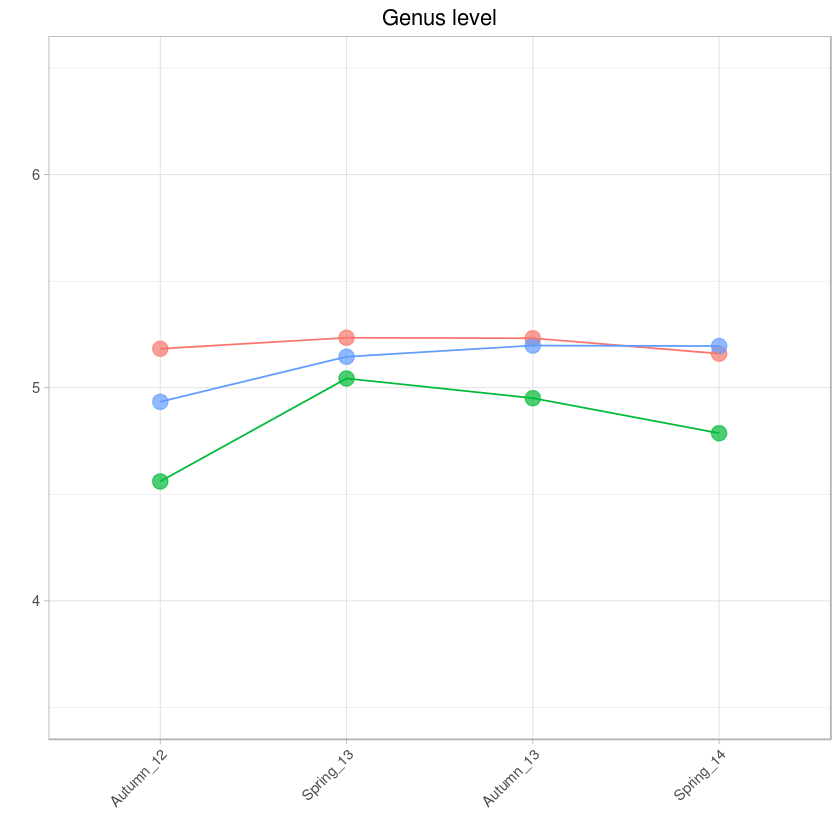

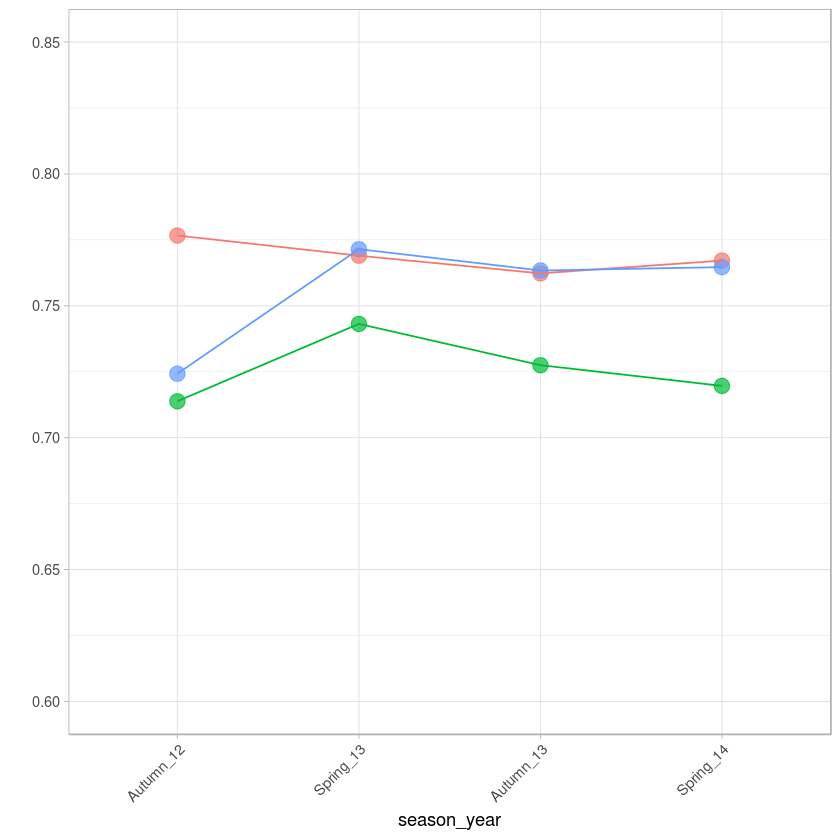

In [24]:
ggplot(div_alpha2, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season_year, y=Shannon, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site))+xlab("")+ ylab("")+ ggtitle("Genus level")+ theme (legend.position = "none",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))+ ylim (3.5,6.5)->p3
ggplot(div_alpha2, aes(x=season_year, y=Pielou2, group=site))+geom_point(aes(x=season_year, y=Pielou2, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site))+ylab("")+ theme (legend.position = "none",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))+ ylim (0.6,0.85)->p4
p3
p4

## Metabolic diversity 

In [46]:
pfam_tab<- as.matrix(read.table("mats_abundances.sort.tab", header=T, row.names=1))
pfamOTU=otu_table(pfam_tab, taxa_are_rows=T)
pfam=phyloseq(pfamOTU)
metadata=read.table("sample_data.txt", header=T)
c("1","1","1","2","2","2","3","3","3","4","4","4")->wl_order
cbind(wl_order,metadata)->metadata
data.frame(Sample_ID=metadata$sample_ID, Site=metadata$site, Year=metadata$year, Period=metadata$samp_period, Water_level=metadata$water_level, Season=metadata$season, wl_order=metadata$wl_order, Temperature=metadata$temp,Conductivity=metadata$sp_comd, Sal=metadata$salt, pH=metadata$pH, row.names=sample_names((pfam)))-> o2
sampledata= sample_data(o2)

pfam=phyloseq(pfamOTU, sampledata)
pfam



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10124 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 11 sample variables ]

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher,Pielou,⋯,year,samp_period,water_level,temp,sp_comd,salt,pH,season_year,wl_order,season
S1,6629,7916.856,92.49518,7786.558,44.12164,7.554437,0.9987244,783.9485,1332.195,0.8585359,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S2,5167,6108.427,77.14891,5951.651,38.07480,7.564737,0.9988252,851.2295,1194.940,0.8847597,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S3,6162,7151.772,80.13313,7034.084,41.61839,7.536980,0.9987023,770.6060,1164.599,0.8637227,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S4,7090,8625.982,107.24925,8428.463,45.96354,7.568078,0.9987335,789.6073,1341.744,0.8535644,⋯,y2013,may,low,20.00,8.360,4.70,8.60,Spring_13,2,Spring
S5,6695,7978.183,94.12588,7803.488,44.01618,7.564408,0.9987472,798.1962,1296.143,0.8587023,⋯,y2013,may,low,20.50,8.300,4.69,8.61,Spring_13,2,Spring
S6,6123,7298.951,92.23206,7080.825,41.78794,7.485337,0.9986792,757.1067,1167.858,0.8584292,⋯,y2013,may,low,20.30,8.300,4.71,8.59,Spring_13,2,Spring
S7,7014,8649.187,114.58063,8350.412,45.63128,7.542102,0.9986914,764.1924,1315.046,0.8516699,⋯,y2013,oct,high,26.50,6.530,3.66,7.90,Autumn_13,3,Autumn
S8,6378,7532.949,92.09878,7286.888,42.15693,7.491470,0.9986547,743.3185,1146.695,0.8551311,⋯,y2013,oct,high,26.16,6.400,3.56,8.06,Autumn_13,3,Autumn
S9,6782,7972.291,89.60556,7793.669,43.75053,7.489023,0.9985754,701.9396,1241.477,0.8489004,⋯,y2013,oct,high,25.42,6.478,3.59,8.07,Autumn_13,3,Autumn
S10,6399,7538.322,86.32907,7425.114,42.94990,7.517991,0.9986962,767.0120,1234.050,0.8578366,⋯,y2014,may,medium,24.99,11.590,6.62,8.09,Spring_14,4,Spring


Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

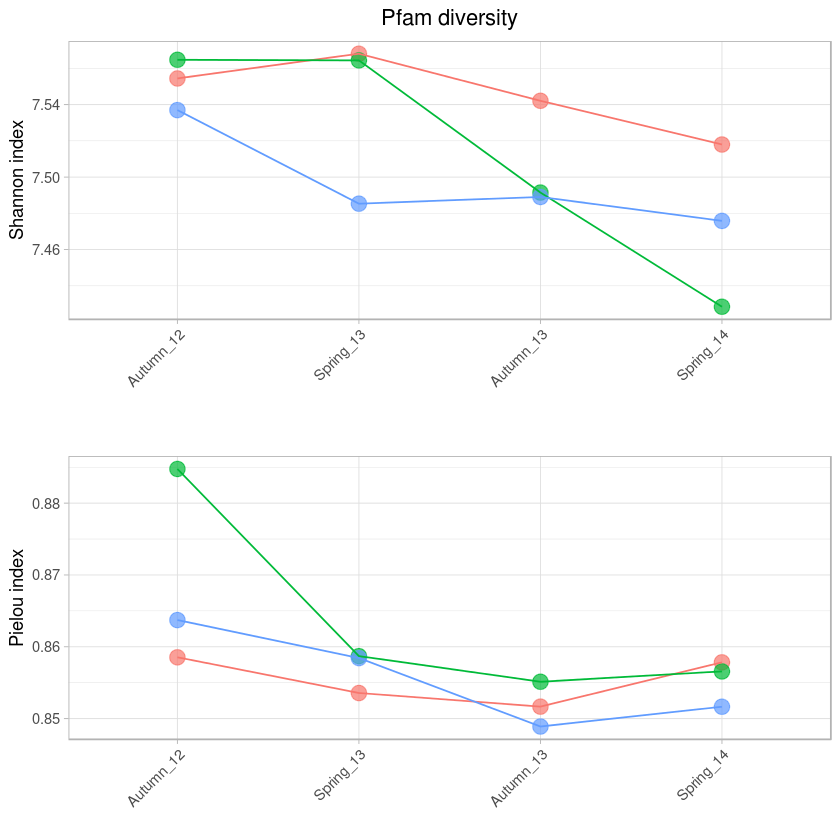

In [28]:
ggplot(div_alpha_p, aes(x=season_year, y=Pielou, group=site))+geom_point(aes(x=season_year, y=Pielou, color=site), size=4, alpha=0.7) +  geom_line(aes(color=site))+ ylab("Pielou index")+xlab("") + ggtitle("")+ theme (legend.position = "none",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))->pfam_pielou
ggplot(div_alpha_p, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season_year, y=Shannon, color=site), size=4, alpha=0.7) +  geom_line(aes(color=site))+ ylab("Shannon index")+xlab("") + ggtitle("Pfam diversity")+ theme (legend.position = "none",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))->pfam_shannon
#ggplot(div_alpha2, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season_year, y=Shannon, color=site), size=4, alpha=0.7) +  geom_line(aes( color=site))+xlab("Shannon")+ ylab("")+ ggtitle("Genus level")+ theme (legend.position = "none",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))+ ylim (3.5,6.5)->p3
#ggplot(div_alpha2, aes(x=season_year, y=Pielou2, group=site))+geom_point(aes(x=season_year, y=Pielou2, color=site), size=4, alpha=0.7) +  geom_line(aes( color=site))+ylab("Pielou")+ theme (legend.position = "none",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))+ ylim (0.6,0.85)->p4
#p3
multiplot (pfam_shannon, pfam_pielou, cols=1)
#pdf("pfam_div.pdf",width=6, height=10)
#multiplot (pfam_shannon, pfam_pielou, cols=1)
#dev.off()

gráfico

In [22]:
theme_set(theme_light())
cbind (div_alpha_p, Pielou, metadata)->div_alpha_p
library(ggplot2)
div_alpha_p$season_year <- factor(div_alpha_p$season_year, levels = div_alpha_p$season_year[order(div_alpha_p$wl_order)])
div_alpha_p$season_year

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

[1] Autumn_12 Autumn_12 Autumn_12 Spring_13 Spring_13 Spring_13 Autumn_13
 [8] Autumn_13 Autumn_13 Spring_14 Spring_14 Spring_14
12 Levels: Autumn_12 Autumn_12 Autumn_12 Spring_13 Spring_13 ... Spring_14

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“d

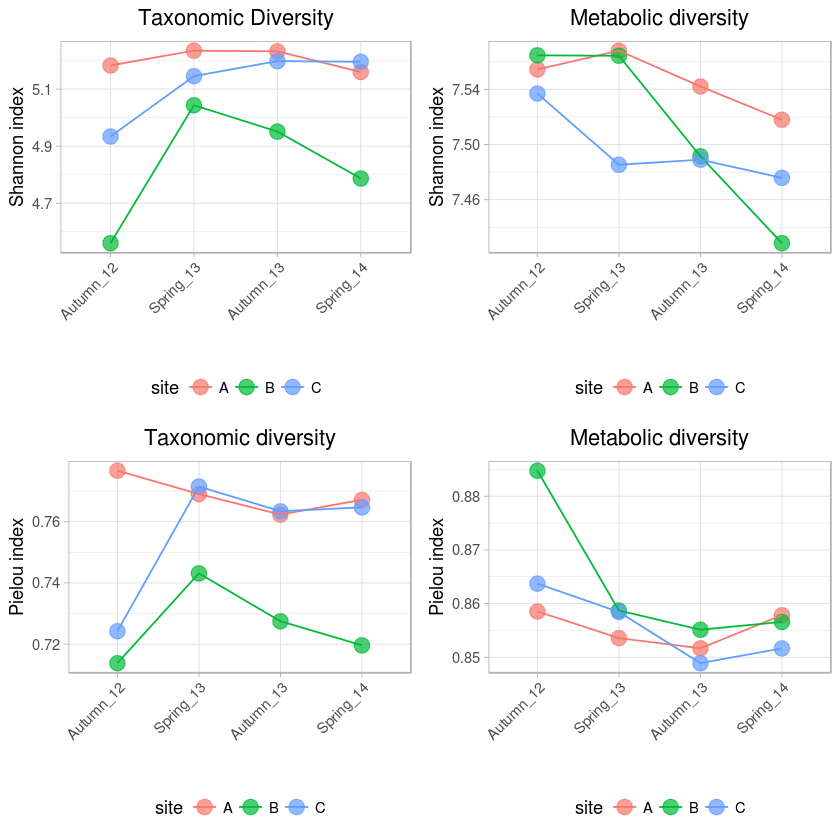

In [39]:
ggplot(div_alpha2, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season_year, y=Shannon, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site))+xlab("")+ ylab("Shannon index")+ ggtitle("Genus level")+ theme (legend.position = "bottom", plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))+ ylim (4.5,7.6)->gen_n
ggplot(div_alpha2, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season_year, y=Shannon, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site))+xlab("")+ ylab("Shannon index")+ ggtitle("Taxonomic Diversity")+ theme (legend.position = "bottom", plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))->gen_tax
ggplot(div_alpha_p, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season, y=Shannon, color=site), size=4, alpha=0.7) +
  geom_line(aes(color=site))+ ylab("Shannon index")+xlab("") + ggtitle("Pfam diversity")+ theme (legend.position = "bottom",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))+ ylim (4.5,7.6)-> pfam_n

ggplot(div_alpha_p, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season_year, y=Shannon, color=site), size=4, alpha=0.7) +
  geom_line(aes(color=site))+ ylab("Shannon index")+xlab("") + ggtitle("Metabolic diversity")+ theme (legend.position = "bottom",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))-> pfam
ggplot(div_alpha_p, aes(x=season_year, y=Pielou, group=site))+geom_point(aes(x=season_year, y=Pielou, color=site), size=4, alpha=0.7) +
  geom_line(aes(color=site))+ ylab("Pielou index")+xlab("") + ggtitle("Metabolic diversity")+ theme (legend.position = "bottom",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))->pfam2
ggplot(div_alpha2, aes(x=season_year, y=Pielou2, group=site))+geom_point(aes(x=season_year, y=Pielou2, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site))+xlab("")+ ylab("Pielou index")+ ggtitle("Taxonomic diversity")+ theme (legend.position = "bottom", plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))->gen_tax2


multiplot (gen_tax, gen_tax2, pfam, pfam2, cols=2)


In [41]:
pdf("genus_pfam_alpha_div.pdf",width=14, height=8.5)
multiplot (gen_tax, gen_tax2, pfam, pfam2, cols=2)
dev.off()

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“d

png 
  2

### Sorting


In [92]:
pfam
mats2
pfam_rel <- transform_sample_counts(pfam, function(x) x / sum(x) * 100)
mats2_rel <- transform_sample_counts(mats2, function(x) x / sum(x) * 100)
sampdat<-(sample_data(mats2))
sampdat->sample_data(pfam)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10124 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 11 sample variables ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1771 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 11 sample variables ]

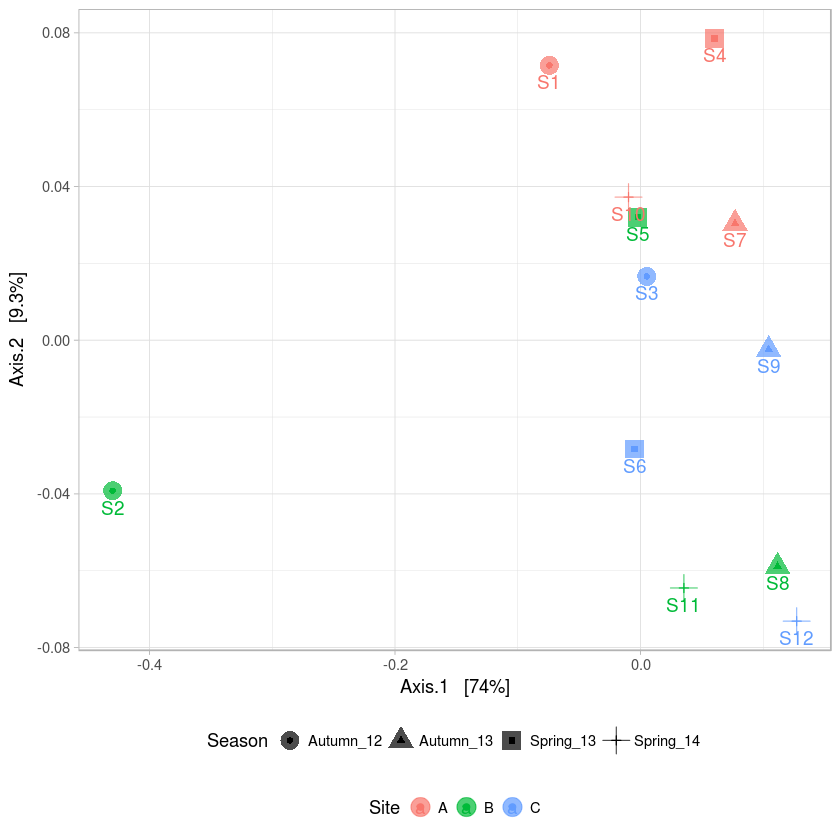

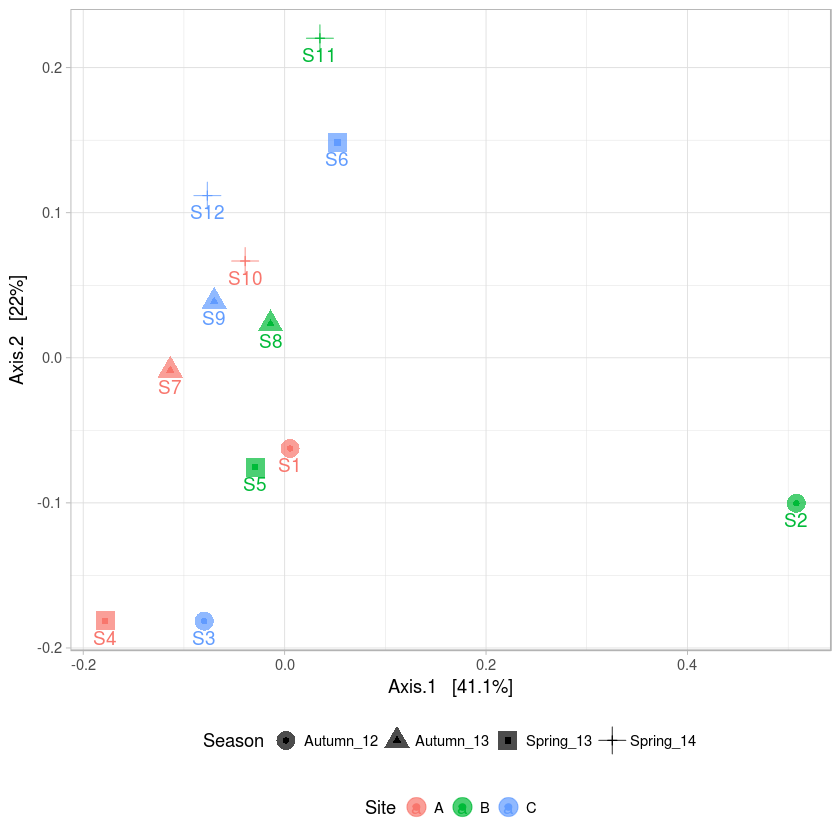

In [93]:
pfam.pcoabray<- ordinate(pfam, "PCoA",distance = "bray")
ordpcoabray<-plot_ordination(pfam, pfam.pcoabray, type="sample", color="Site", shape="Season")+geom_point(size=5, alpha=0.7)+theme_light()+theme(legend.position= "bottom", legend.box="vertical")+geom_text(aes(label = Sample_ID), size = 4, vjust = 1.7)
print(ordpcoabray)
ggsave("PCoA_pfam_bray_samp.pdf", width=21, height=25, units="cm")

gen.pcoabray<- ordinate(mats2, "PCoA",distance = "bray")
ordpcoabray2<-plot_ordination(mats2, gen.pcoabray, type="sample", color="Site", shape="Season")+geom_point(size=5, alpha=0.7)+theme_light()+theme(legend.position= "bottom", legend.box="vertical")+geom_text(aes(label = Sample_ID), size = 4, vjust = 1.7)
print(ordpcoabray2)
ggsave("PCoA_genus_bray_samp.pdf", width=21, height=25, units="cm")



Warning message in decorana(veganifyOTU(physeq), ...):
“some species were removed because they were missing in the data”

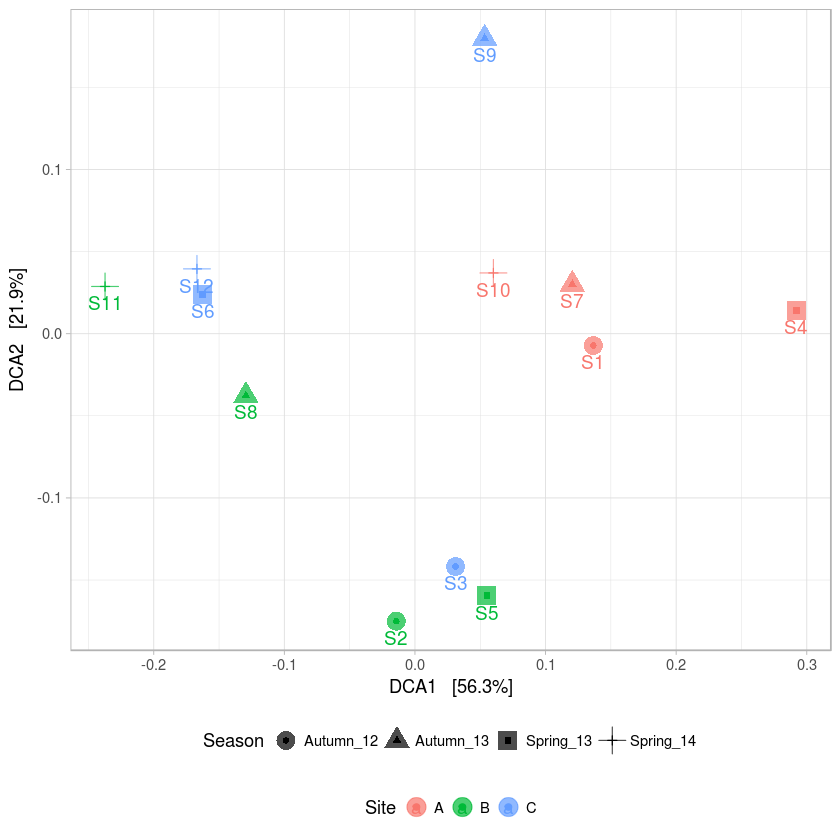

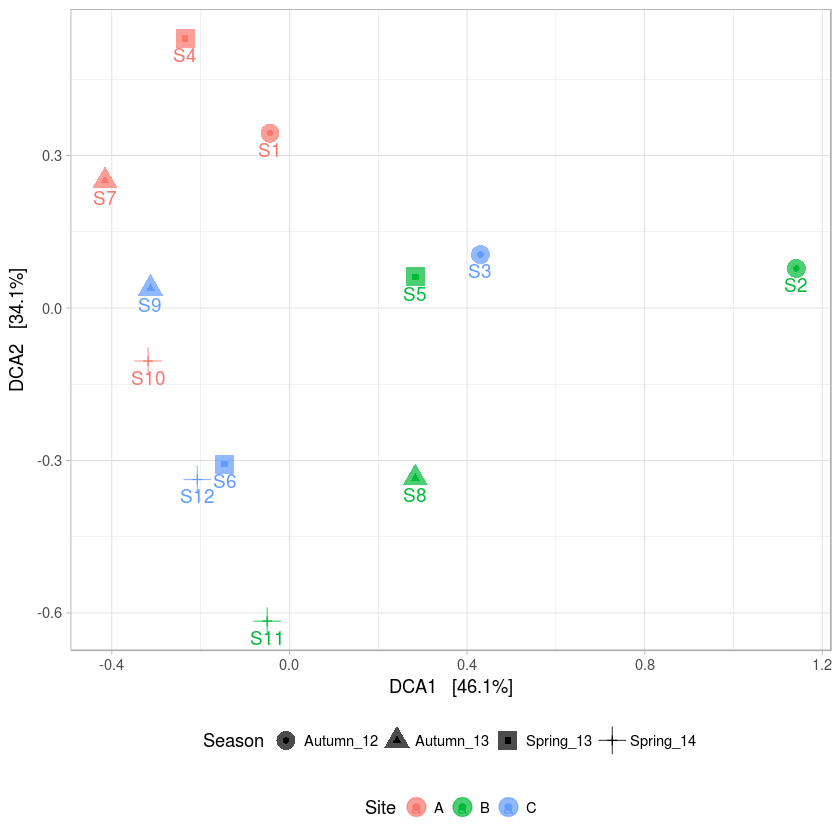

In [94]:
pfam.pcoabray<- ordinate(pfam, "DCA",distance = "bray")
ordpcoabray<-plot_ordination(pfam, pfam.pcoabray, type="sample", color="Site", shape="Season")+geom_point(size=5, alpha=0.7)+theme_light()+theme(legend.position= "bottom", legend.box="vertical")+geom_text(aes(label = Sample_ID), size = 4, vjust = 1.7)
print(ordpcoabray)
ggsave("DCA_pfam_bray_samp.pdf", width=21, height=25, units="cm")

gen.pcoabray<- ordinate(mats2, "DCA",distance = "bray")
ordpcoabray2<-plot_ordination(mats2, gen.pcoabray, type="sample", color="Site", shape="Season")+geom_point(size=5, alpha=0.7)+theme_light()+theme(legend.position= "bottom", legend.box="vertical")+geom_text(aes(label = Sample_ID), size = 4, vjust = 1.7)
print(ordpcoabray2)
ggsave("DCA_genus_bray_samp.pdf", width=21, height=25, units="cm")


In [ ]:
#Para hacer ordenamiento con taxa o funciones necesito la tabla con la jerarquía de cada género y cada pfam
gpt2 <- prune_taxa(names(sort(taxa_sums(mats2),TRUE)[1:1000]),mats2)
GP1=gpt2
phylum.sum = tapply(taxa_sums(GP1), tax_table(GP1)[, "order"], sum, na.rm=TRUE)
top10phyla = names(sort(phylum.sum, TRUE))[1:30]
GP1 = prune_taxa((tax_table(GP1)[, "Order"] %in% top10phyla), GP1)

GP.ord2 <- ordinate(GP1, "PCoA",  "bray")
p2 = plot_ordination(GP1, GP.ord2, type="taxa",color="phylum", title="taxa")
p2 + facet_wrap(~Order, 5)+ theme(text = element_text(size=16),legend.position="bottom")+geom_point(size=3)+scale_color_manual(values = colorRampPalette(brewer.pal(11, "Set3"))(13)) # o scale_color_brewer(palette="Paired")
ggsave("taxa_pcoa_ord.pdf")


## Permanova
Here is an example of how to run a permanova test using the adonis function in vegan. In this example we are testing the hypothesis that the three stations we collected samples from have different centroids
This output tells us that our adonis test is significant so we can reject the null hypothesis that our three sites have the same centroid.

In [131]:
set.seed(1)
#Para datos taxonómicos y probando variable Sitio
# Calculate bray curtis distance matrix
mats2_bray <- phyloseq::distance(mats2_rel, method = "bray")
# make a data frame from the sample_data
sampledf <- data.frame(sample_data(mats2))
# Adonis test
adonis(mats2_bray ~ Site+Season, data = sampledf)

#Para pfamss y probando variable Sitio
# Calculate bray curtis distance matrix
pfam_bray <- phyloseq::distance(pfam_rel, method = "bray")
# make a data frame from the sample_data
sampledf <- data.frame(sample_data(pfam))
# Adonis test
adonis(pfam_bray ~ Site+Season, data = sampledf)


Call:
adonis(formula = mats2_bray ~ Site + Season, data = sampledf) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)  
Site       2   0.16945 0.084727  2.4637 0.27842  0.014 *
Season     3   0.23284 0.077613  2.2569 0.38256  0.021 *
Residuals  6   0.20634 0.034390         0.33902         
Total     11   0.60863                  1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = pfam_bray ~ Site + Season, data = sampledf) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)   
Site       2  0.027578 0.0137888  2.3247 0.30080  0.005 **
Season     3  0.028513 0.0095044  1.6024 0.31101  0.072 . 
Residuals  6  0.035589 0.0059315         0.38819          
Total     11  0.091680                   1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Homogeneity of dispersion test

Additionally, our betadisper results are not significant, meaning we cannot reject the null hypothesis that our groups have the same dispersions. This means we can be more confident that our adonis result is a real result, and not due to differences in group dispersions



In [134]:
beta <- betadisper(mats2_bray, sampledf$Season)
permutest(beta)

beta <- betadisper(pfam_bray, sampledf$Season)
permutest(beta)



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df    Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.0096461 0.0032154 0.8292    999  0.515
Residuals  8 0.0310222 0.0038778                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df    Sum Sq    Mean Sq      F N.Perm Pr(>F)
Groups     3 0.0015231 0.00050768 0.4677    999  0.726
Residuals  8 0.0086834 0.00108543                     

In [17]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}